# Model Tuning #

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import usefull_methods as um
import do_actions as do

from stopwatch import Stopwatch
stopwatch = Stopwatch()

# Pretty display for notebooks
%matplotlib inline


In [2]:
def print_shape(data, name):
    print("{0}: {1}".format(name, data.shape))

# Handle Missing Data#

In [3]:
def show_missing(data):
    # df.isnull() Return a boolean same-sized object indicating if the values are null.
    # df.any() Return whether any element is True over requested axis
    #
    missing = data.columns[data.isnull().any()].tolist()
    return missing

# Looking at categorical values
def cat_exploration(data, column):
    return data[column].value_counts()

# deleting missing data
def handle_missing(data, column, value):
    data.loc[data[column].isnull(),column] = value
    return data

def count_missing(data):
    data[show_missing(data)].isnull().sum()

In [4]:
def do_handle_missing_data(data):
    data = handle_missing(data, 'PoolQC', 'None')
    data = handle_missing(data, 'MiscFeature', 'None' )
    data = handle_missing(data, 'Alley', 'None' )
    data = handle_missing(data, 'Fence', 'None' )
    data = handle_missing(data, 'FireplaceQu', 'None' )
    data = handle_missing(data, 'LotFrontage', 0.0 )
    
    data = handle_missing(data, 'GarageType', 'None' )
    data = handle_missing(data, 'GarageYrBlt', 0.0 )
    data = handle_missing(data, 'GarageFinish', 'None' )
    data = handle_missing(data, 'GarageQual', 'None' )
    data = handle_missing(data, 'GarageCond', 'None' )
    data = handle_missing(data, 'GarageArea', 0.0 )
    data = handle_missing(data, 'GarageCars', 'None' )
 
    data = handle_missing(data, 'BsmtQual', 'None' )
    data = handle_missing(data, 'BsmtCond', 'None' )
    data = handle_missing(data, 'BsmtExposure', 'None' )
    data = handle_missing(data, 'BsmtFinType1', 'None' )
    data = handle_missing(data, 'BsmtFinType2', 'None' )
    
    data = handle_missing(data, 'BsmtFinSF1', 0.0)
    data = handle_missing(data, 'BsmtFinSF2', 0.0 )
    data = handle_missing(data, 'BsmtFullBath', 'None' )
    data = handle_missing(data, 'BsmtHalfBath', 'None' )
    data = handle_missing(data, 'BsmtUnfSF', 0.0 )
    
    data = handle_missing(data, 'TotalBsmtSF', 0.0 )
    data = handle_missing(data, 'MasVnrArea', 0.0 )
    
    # missing data replaced by most frequent value
    data = handle_missing(data, 'MasVnrType', 'None' )
    data = handle_missing(data, 'Electrical','SBrkr' )
    data = handle_missing(data, 'Functional','Typ' )
    data = handle_missing(data, 'KitchenQual','TA' )
    data = handle_missing(data, 'MSZoning','RL' )
    data = handle_missing(data, 'Exterior1st','VinylSd' )
    data = handle_missing(data, 'Exterior2nd','VinylSd' )    
    data = handle_missing(data, 'SaleType','WD' )
    
    # not in training set
    data = data.drop(['Utilities'], axis=1)
    
    return data

# Handle Categorical  Data #

In [5]:
categoricaldata = ('MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'PoolQC',
                       'Street', 'BsmtCond', 'GarageCond', 'GarageQual',
                      'BsmtQual', 'CentralAir', 'ExterQual', 'ExterCond', 'HeatingQC',
                      'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional',
                      'BsmtExposure', 'GarageFinish','LandSlope', 'LotShape', 'MSZoning',
                      'LandContour', 'LotConfig', 'Neighborhood', 'Condition1',
                      'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                      'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType',
                      'PavedDrive', 'SaleType', 'SaleCondition')


scalerdata = ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 
                 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 
                 'Fireplaces', 'FullBath',  'GarageCars', 'GarageYrBlt', 
                 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 
                 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 
                 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch', 
                 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']


# Data Skew #

In [6]:
import seaborn as sns

def plot_distribution(data, label):
    # set size of the graph
    plt.subplots(figsize=(20, 7))
    ax = sns.distplot(data, color="g", kde=True )
    ax.axvline(np.mean(data),linewidth=1, color='b')
    ax.axvline(np.median(data),linewidth=1, color='r')

    plt.title("Distribution of {}".format(label))
    plt.ylabel("Number of Occurences")
    plt.xlabel(label);
    plt.show()

In [7]:
from scipy.special import boxcox1p

def check_skewed(data, treshold):
    skewcheck = data.dtypes[data.dtypes != "object"].index
    skewed = data[skewcheck].skew().sort_values(ascending=False)
    skew_df = pd.DataFrame(skewed)
    skew_df = abs(skew_df)
    skew_df = skew_df[skew_df > treshold]
    skew_df = skew_df.dropna()
    return skew_df

def unskew_boxcox1p(data, skew_df, lm):
    needs_fixing = skew_df.index
    for x in needs_fixing:
        data[x] = boxcox1p(data[x], lm)
        #data[x] += 1
    return data

def unskew_boxcox1p_all(data, lm):
    return boxcox1p(data, lm)

from scipy.special import inv_boxcox1p

def skew_inv_boxcox1p(data, lm):
    return inv_boxcox1p(data, lm)
    
print("accepted")    

accepted


# Data Drop #

In [8]:
def do_remove_outliers_simple(data):
    data = data.drop(data[(data['GrLivArea']>4000) & (data['SalePrice']<300000)].index)
    return data

def do_outliers_Ids(data):
    a = data['GrLivArea']>4000
    b = data['SalePrice']<300000
    f = [a, b]
    return pd.concat(f)

# Standardization #

In [13]:
data_train, data_test = um.load_data()

data_train = do_handle_missing_data(data_train)
data_train = pd.get_dummies(data_train, columns=list(categoricaldata))

scalerdata = ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 
                 'BsmtFinSF2', 'BsmtUnfSF', 'EnclosedPorch', 
                 'Fireplaces',  'GarageYrBlt', 'HalfBath', 'FullBath',
                 'GrLivArea',  'KitchenAbvGr', 'LotArea', 'LotFrontage', 
                 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 
                 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch', 
                 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']

#   'GarageCars', 'SalePrice', 'BsmtFullBath', 'BsmtHalfBath', 

from sklearn.preprocessing import StandardScaler


# Model #

In [14]:
stopwatch.start()
data_train, data_test = um.load_data()

print_shape( data_train, 'data_train')
print_shape( data_test, 'data_test')

# get outliers Id, will be removed later
data_train = do.remove_this_Ids(data_train, [524, 1299])

# target variable, preserve and remove from data
target_train = data_train[['SalePrice','Id']]
data_train = data_train.drop(['SalePrice'], axis = 1)


# concatenate test and train data
train_ids = data_train['Id']
test_ids = data_test['Id']

print_shape( train_ids, 'train_ids')
print_shape( test_ids, 'test_ids')

all_data = pd.concat([data_train, data_test])
all_ids = all_data['Id']

all_data = do_handle_missing_data(all_data)
all_data = do.add_TotalSF(all_data)

dropcolumns = ('BsmtFinSF2','BsmtHalfBath','MiscVal','LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch',
 'KitchenAbvGr',   'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch',  'MoSold', '3SsnPorch')

# LABEL ENCODER
all_data = do.encode_categorical(all_data, categoricaldata)

# DROP SOME DATA  & DO ONE HOT ENCODING
drop_columns = False
do_dummies = True
if drop_columns:
    all_data = all_data.drop(list(dropcolumns), axis = 1)
    to_dummies = set(categoricaldata) - set(dropcolumns)
    if do_dummies:
        all_data = pd.get_dummies(all_data, columns=list(to_dummies))
else:
    if do_dummies:
        all_data = pd.get_dummies(all_data, columns=list(categoricaldata))

keep_cols = all_data.select_dtypes(include = ['number']).columns
all_data = all_data[keep_cols]

all_data_untransformed = all_data.copy()
target_untransformed = target_train.copy()

# UNSKEW
unskew_data = True
if unskew_data:
    skewed_data = check_skewed(all_data, 0.75)
    all_data = unskew_boxcox1p(all_data, skewed_data, 0.25)
    target_train = boxcox1p(target_train, 0.25)

print_shape( all_data, 'all_data')
    
# STANDARDIZATION
do_scaling = True
if do_scaling:
    # scale features
    scaler = StandardScaler()
    scaler.fit(all_data[scalerdata])
    all_data[scalerdata] = scaler.transform(all_data[scalerdata])
    # scale target variable
    if True:
        scaler2 = StandardScaler()
        X = target_train['SalePrice'].values.reshape(-1,1)
        scaler2.fit(X)
        target_train_scaled = scaler2.transform(X)
        target_train['SalePrice'] = target_train_scaled
        # check with inverse
        inv_X = scaler2.inverse_transform(target_train_scaled)
        #print(np.isclose(inv_X.astype(np.float),X.astype(np.float)))

    
print_shape( all_data, 'all_data')

all_data['Id'] = all_ids

features_train = all_data[all_data['Id'].isin(train_ids)]
features_test = all_data[all_data['Id'].isin(test_ids)]
print_shape( features_train, 'features_train')
print_shape( features_test, 'features_test')

#features_train = features_train.drop(features_train['Id'].isin(outliers_ids))
#target_train = target_train.drop(target_train['Id'].isin(outliers_ids))

features_train = features_train.drop(['Id'], axis = 1)
features_test = features_test.drop(['Id'], axis = 1)
target_train = target_train.drop(['Id'], axis = 1)
target_train = target_train['SalePrice'].values

print_shape( features_train, 'features_train')
print_shape( features_test, 'features_test')
print_shape( target_train, 'target_train')

print(features_train.columns[features_train.isnull().any()])
print(features_test.columns[features_test.isnull().any()])

features_test.head()

features = features_train
target = target_train


data_train: (1460, 81)
data_test: (1459, 80)
train_ids: (1458L,)
test_ids: (1459L,)
all_data: (2917, 298)
all_data: (2917, 298)
features_train: (1458, 298)
features_test: (1459, 298)
features_train: (1458, 297)
features_test: (1459, 297)
target_train: (1458L,)
Index([], dtype='object')
Index([], dtype='object')


In [15]:
print(target)

[ 0.51724559  0.1621281   0.69982161 ...,  1.17669837 -0.43484403
 -0.34655961]


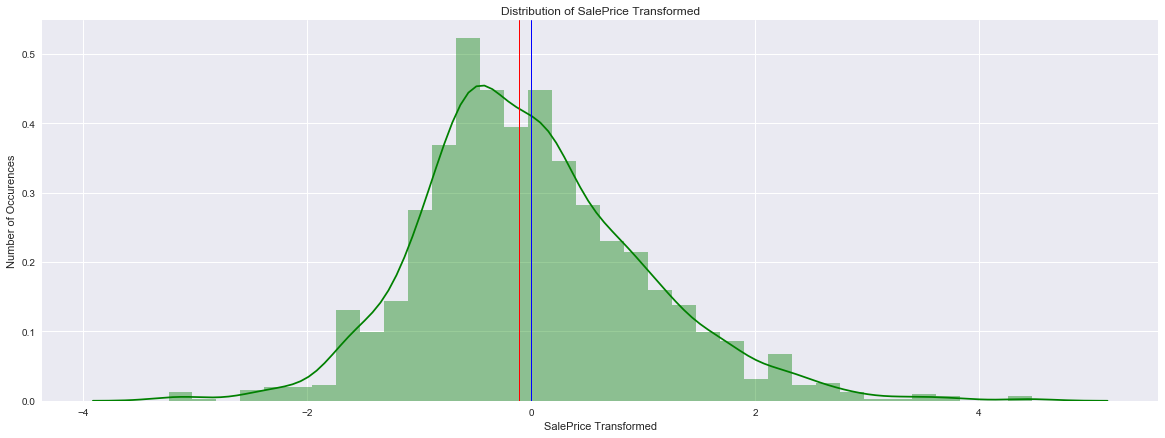

In [16]:
plot_distribution(target_train, 'SalePrice Transformed')

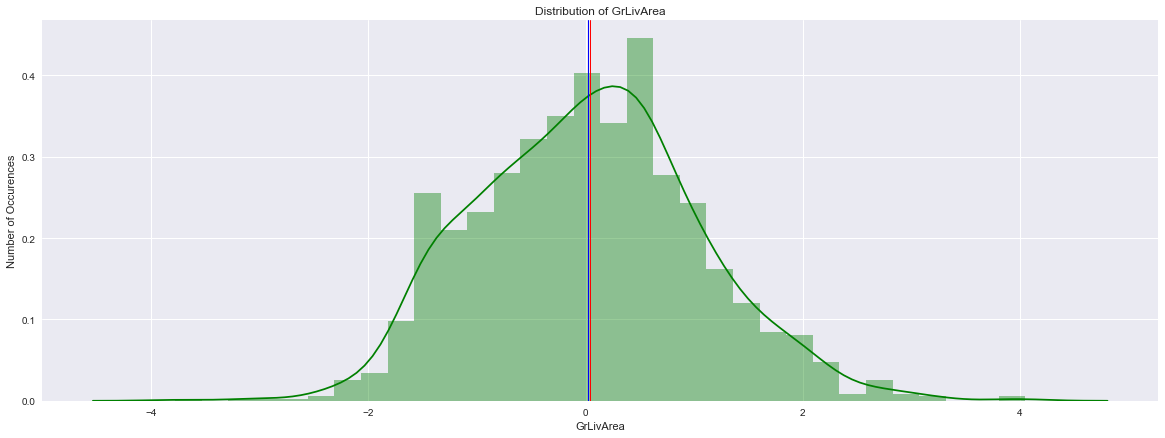

In [17]:
plot_distribution(features['GrLivArea'], 'GrLivArea')

# Metrics #

In [18]:
import sklearn
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def RMSE(y, y_pred):
    return np.sqrt(np.sum(np.square(y_pred-y))/len(y))

def RMSElog(y, y_pred):
    y = np.log(y)
    y_pred = np.log(y_pred)
    return np.sqrt(np.sum(np.square(y_pred-y))/len(y))

def calc_metrics(y, y_pred):
    r2score = r2_score(y, y_pred)
    rmse_log = RMSElog(y, y_pred)
    rmse = RMSE(y, y_pred)
    return rmse, rmse_log,  r2score

def print_metrics (rmse, rmse_log,r2score):
    print('RMSE               : {:.4f}'.format(rmse, prec=5))
    print('RMSE of logarithms : {:.4f}'.format(rmse_log, prec=5))
    print('R2 score           : {:.6f}'.format(r2score, prec = 5))
    
def show_metrics(y, y_pred):
    rmse, rmse_log, r2score = calc_metrics(y, y_pred)
    print_metrics(rmse, rmse_log, r2score )
    return rmse, rmse_log, r2score
       

# Methods #

In [19]:
from xgboost import XGBRegressor
xgb = XGBRegressor(colsample_bytree=0.2, learning_rate=0.05, max_depth=2, n_estimators=1700, random_state = 133)

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=1000, max_features = 'sqrt',  learning_rate = 0.05, random_state=1234)

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=20, n_estimators=375, max_features = 'sqrt', oob_score=True, random_state=1234)

# Grid Search #

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score

class GridSearchObject:
    def __init__(self, estimator, grid_params):
        self.estimator = estimator
        self.name = type(estimator).__name__
        self.grid_params = grid_params

class GridSearchBatch:
    def __init__(self, features,target):
        self.features = features
        self.target = target
        self.results_list = []
        self.batch_list = []
        self.stopwatch = Stopwatch()

    def add(self, grid_search_object):
        self.batch_list.append(grid_search_object)
        
    def run(self):
        scorer = make_scorer(r2_score)
        for gso in self.batch_list:
            self.stopwatch.start()
            grid_search = GridSearchCV(gso.estimator, gso.grid_params, scoring = scorer, cv=5, n_jobs =-1)
            grid_search.fit(self.features, self.target)
            duration = self.stopwatch.elapsed_time()
            cv_results = grid_search.cv_results_
            cv_results.update({'duration':duration})
            cv_results.update({'name':gso.name})
            cv_results.update({'grid_params':gso.grid_params})
            self.results_list.append(cv_results)
            self.stopwatch.print_elapsed_time()
            print(gso.name)
            print(grid_search.best_estimator_)
            print(grid_search.best_score_ )
        return self.results_list
            

In [21]:
batch = GridSearchBatch(features, target)

# param_grid - dict or list of dictionaries
param_grid = {'max_depth': [ 20, 25, 30, 32  ], 'n_estimators':[375, 400, 500, 600, 700 ]}
#param_grid = {'max_depth': [ 15, 20, 25, 30, 32  ], 'n_estimators':[275, 300, 325, 350, 375, 400 ]}
#param_grid = {'max_depth': [ 30, 32, 36, ], 'n_estimators':[275, 300, 325, ]}
#cv_scores = cross_val_score(rf_test, features, target, cv = 5, n_jobs = -1)
estimator = RandomForestRegressor(max_features = 100, oob_score=True, random_state=458)
#batch.add( GridSearchObject(estimator, param_grid))

param_grid = {'max_depth': [ 2, 3, 5 ], 'n_estimators':[ 800, 900, 1000, 1100, 1200  ]}
estimator = GradientBoostingRegressor( max_features = 100,  random_state=1234)
#batch.add( GridSearchObject(estimator, param_grid))

param_grid = {'max_depth': [ 2, 3, 4], 'n_estimators':[ 1600, 1700, 1800, 2000 ]}
estimator = XGBRegressor(colsample_bytree=0.2, learning_rate=0.05, random_state = 1337 )
batch.add( GridSearchObject(estimator, param_grid))

# takes long !!!
# results = batch.run()

Elapsed time: 00:06:47

RandomForestRegressor
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features=100, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=True, random_state=458, verbose=0, warm_start=False)
0.898382838789

Elapsed time: 00:06:54

GradientBoostingRegressor
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=100,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=1234, subsample=1.0, verbose=0,
             warm_start=False)
0.92324072887

Elapsed time: 00:02:31

XGBRegressor
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=1800,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=1337,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
0.926241453432



# Best Regressors #

In [22]:
from xgboost import XGBRegressor
xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=1800,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=1337,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=100,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=1234, subsample=1.0, verbose=0,
             warm_start=False)

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features=100, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=True, random_state=458, verbose=0, warm_start=False)

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

def cross_validation( regressor,features, target ):
    stopwatch.start()
    print(type(regressor).__name__)
    y_pred = cross_val_predict(regressor, features, target, cv = 5, n_jobs = -1)
    rmse, rmse_log, r2score = show_metrics( target, y_pred)
    stopwatch.print_elapsed_time()
    return rmse, rmse_log, r2score
    
def cross_validation_prediction( regressor,features, target ):
    stopwatch.start()
    print(type(regressor).__name__)
    y_pred = cross_val_predict(regressor, features, target, cv = 5, n_jobs = -1)
    stopwatch.print_elapsed_time()
    return y_pred

In [24]:
print(target)

[ 0.51724559  0.1621281   0.69982161 ...,  1.17669837 -0.43484403
 -0.34655961]


In [25]:
xgb_rmse, xgb_rmse_log, xgb_r2 = cross_validation(xgb, features, target)
gbr_rmse, gbr_rmse_log, gbr_r2 = cross_validation(gbr, features, target)
rfr_rmse, rfr_rmse_log, rfr_r2 = cross_validation(rfr, features, target)

sum_rmse = xgb_rmse + gbr_rmse + rfr_rmse
sum_rmse_log = xgb_rmse_log + gbr_rmse_log + rfr_rmse_log
sum_r2 = xgb_r2 + gbr_r2 + rfr_r2

xgb_w = xgb_r2/sum_r2
gbr_w = gbr_r2/sum_r2
rfr_w = rfr_r2/sum_r2


XGBRegressor


C:\Users\jiri_\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\Users\jiri_\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


RMSE               : 0.2765
RMSE of logarithms : nan
R2 score           : 0.923540

Elapsed time: 00:00:19

GradientBoostingRegressor
RMSE               : 0.2890
RMSE of logarithms : nan
R2 score           : 0.916499

Elapsed time: 00:00:13

RandomForestRegressor
RMSE               : 0.3192
RMSE of logarithms : nan
R2 score           : 0.898133

Elapsed time: 00:00:26



XGBRegressor
RMSE               : 21546.7702
RMSE of logarithms : 0.1181
R2 score           : 0.926484

Elapsed time: 00:00:16

GradientBoostingRegressor
RMSE               : 22004.9835
RMSE of logarithms : 0.1224
R2 score           : 0.923324

Elapsed time: 00:00:12

RandomForestRegressor
RMSE               : 25372.8165
RMSE of logarithms : 0.1352
R2 score           : 0.898058

Elapsed time: 00:00:26

In [26]:
xgb_pred_raw = cross_validation_prediction(xgb, features, target)
gbr_pred_raw = cross_validation_prediction(gbr, features, target)
rfr_pred_raw = cross_validation_prediction(rfr, features, target)

predictions = xgb_w* xgb_pred_raw + gbr_w * gbr_pred_raw + rfr_w * rfr_pred_raw

XGBRegressor

Elapsed time: 00:00:20

GradientBoostingRegressor

Elapsed time: 00:00:13

RandomForestRegressor

Elapsed time: 00:00:27



In [27]:
lm = 0.25

if do_scaling:
    xgb_pred_unscaled = scaler2.inverse_transform(xgb_pred_raw)
    gbr_pred_unscaled = scaler2.inverse_transform(gbr_pred_raw)
    rfr_pred_unscaled = scaler2.inverse_transform(rfr_pred_raw)
else:
    xgb_pred_unscaled = xgb_pred_raw
    gbr_pred_unscaled = gbr_pred_raw
    rfr_pred_unscaled = rfr_pred_raw
    
if unskew_data:
    xgb_pred_normal = skew_inv_boxcox1p(xgb_pred_unscaled, lm)
    gbr_pred_normal = skew_inv_boxcox1p(gbr_pred_unscaled, lm)
    rfr_pred_normal = skew_inv_boxcox1p(rfr_pred_unscaled, lm)
else:
    xgb_pred_normal = xgb_pred_unscaled
    gbr_pred_normal = gbr_pred_unscaled
    rfr_pred_normal = rfr_pred_unscaled

target_normal = target_untransformed['SalePrice'].values
print('XGBoost')    
show_metrics(target_normal, xgb_pred_normal )
print("\n")
print('Gradient Boost')
show_metrics(target_normal, gbr_pred_normal )
print("\n")
print('Random Forest')
show_metrics(target_normal, rfr_pred_normal )
print("\n")

predictions_normal = xgb_w* xgb_pred_normal + gbr_w * gbr_pred_normal + rfr_w * rfr_pred_normal

XGBoost
RMSE               : 21935.7116
RMSE of logarithms : 0.1144
R2 score           : 0.923806


Gradient Boost
RMSE               : 22624.9584
RMSE of logarithms : 0.1199
R2 score           : 0.918942


Random Forest
RMSE               : 25899.3463
RMSE of logarithms : 0.1325
R2 score           : 0.893783




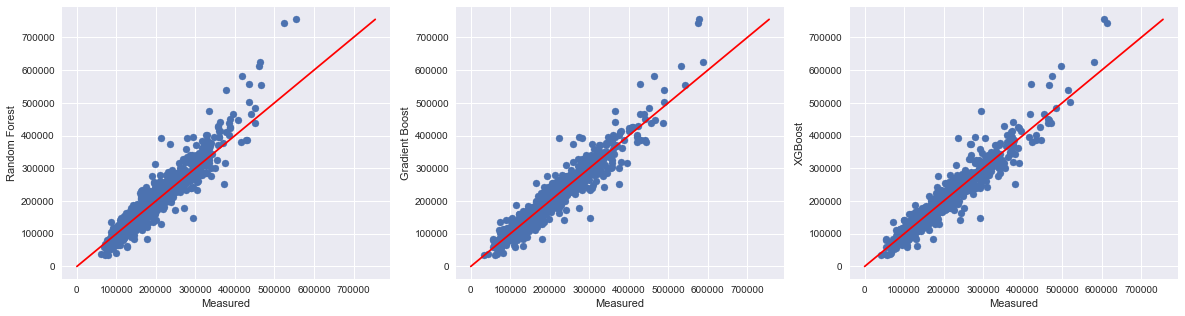

In [28]:
target_train = target_untransformed['SalePrice'].values
plt.figure(figsize=(20,5))
ax1 = plt.subplot(1,3,1)
ax1.scatter( rfr_pred_normal, target_train)
ax1.plot([-3,max(target_train)],[ -3,max(target_train)], '-', color='r', )
ax1.set_xlabel('Measured')
ax1.set_ylabel('Random Forest')
ax2 = plt.subplot(1,3,2)
ax2.scatter( gbr_pred_normal, target_train)
ax2.plot([0,max(target_train)],[ 0,max(target_train)], '-', color='r', )
ax2.set_xlabel('Measured')
ax2.set_ylabel('Gradient Boost')
ax2 = plt.subplot(1,3,3)
ax2.scatter( xgb_pred_normal, target_train)
ax2.plot([0,max(target_train)],[ 0,max(target_train)], '-', color='r', )
ax2.set_xlabel('Measured')
ax2.set_ylabel('XGBoost')
plt.show()

In [29]:
print('Stacked regressions')
show_metrics(target_normal, predictions_normal )

Stacked regressions
RMSE               : 22240.0829
RMSE of logarithms : 0.1153
R2 score           : 0.921677


(22240.082865827557, 0.11531005787835494, 0.92167677833863904)

# Output #

In [30]:
# use all data for learning

stopwatch.start()

rfr.fit(features_train, target_train)
predictions_rfr = rfr.predict(features_test)
stopwatch.print_elapsed_time()

gbr.fit(features_train, target_train)
predictions_gbr = gbr.predict(features_test)
stopwatch.print_elapsed_time()

xgb.fit(features_train, target_train)
predictions_xgb = xgb.predict(features_test)
stopwatch.print_elapsed_time()


#  stacked 
predictions = xgb_w* predictions_xgb + gbr_w * predictions_gbr + rfr_w * predictions_rfr
#predictions = predictions_xgb

out_preds = pd.DataFrame()
out_preds['Id'] = test_ids
out_preds['SalePrice'] = predictions
out_preds.to_csv('output7.csv', index=False)

stopwatch.print_elapsed_time()



Elapsed time: 00:00:08


Elapsed time: 00:00:11


Elapsed time: 00:00:16


Elapsed time: 00:00:16




 Support vector best score:
0.739207635225
 Support vector best parameters:
{'C': 10.0, 'gamma': 0.01}

Elapsed time: 00:02:21



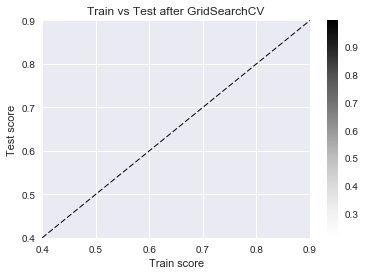

In [31]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

rng = np.random.RandomState()

stopwatch.start()
# Fit regression model

svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})
svr.fit(features, target)

print("\n Support vector best score:")
print(svr.best_score_)
print(" Support vector best parameters:")
print(svr.best_params_)

stopwatch.print_elapsed_time()

results = pd.DataFrame(svr.cv_results_)
results['Difference'] = results['mean_train_score'] - results['mean_test_score']
results = results.sort_values('mean_test_score', ascending=False)
results.to_csv("SVR_train_vs_test_CV.csv", index=False)

tr = svr.cv_results_['mean_train_score']
te = svr.cv_results_['mean_test_score']
diff = tr - te
plt.figure(1)
plt.title("Train vs Test after GridSearchCV")
plt.scatter(tr, te, c=diff)
plt.colorbar()
plt.plot([0.4, 0.9], [0.4, 0.9], 'k--', lw=1)
plt.xlim( 0.4, 0.9 )
plt.ylim( 0.4, 0.9 )
plt.xlabel('Train score')
plt.ylabel('Test score')
plt.savefig('SVR_train_vs_test_CV.png')
plt.show()

In [32]:
svr.best_estimator_

SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [33]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

stopwatch.start()
svr = SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

svr_pred = cross_validation_prediction(svr, features, target)
stopwatch.print_elapsed_time()

SVR

Elapsed time: 00:00:14


Elapsed time: 00:00:14



In [34]:
print(target)

[ 0.51724559  0.1621281   0.69982161 ...,  1.17669837 -0.43484403
 -0.34655961]


In [36]:
print(svr_pred.shape )

if 
svr_pred_normal = scaler2.inverse_transform(svr_pred)

y = target_untransformed['SalePrice'].values.reshape(-1,1)
print(svr_pred)
print(target)
show_metrics(target, svr_pred )


(1458L,)
[ 0.54460888 -0.06404626  0.9685712  ...,  0.00372258 -0.73937342
 -0.45067349]
[ 0.51724559  0.1621281   0.69982161 ...,  1.17669837 -0.43484403
 -0.34655961]
RMSE               : 0.5096
RMSE of logarithms : nan
R2 score           : 0.740299


C:\Users\jiri_\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\Users\jiri_\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


(0.50960868680243498, nan, 0.74029898633549762)

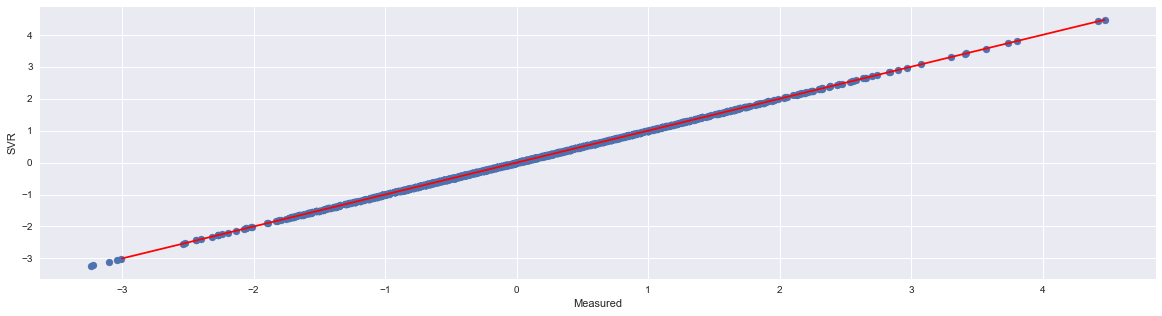

In [37]:

fig, ax1 = plt.subplots(figsize=(20,5))
ax1.scatter( target, target)
ax1.plot([-3,max(target)],[ -3,max(target)], '-', color='r', )
ax1.set_xlabel('Measured')
ax1.set_ylabel('SVR')
plt.show()